CLAHE method

In [1]:
import cv2
import numpy as np
import skimage.exposure
from google.colab.patches import cv2_imshow

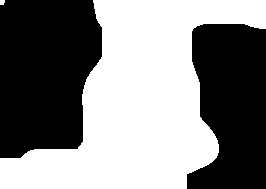

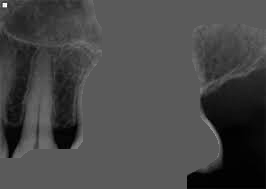

In [5]:
# load images
img1 = cv2.imread('/content/images.jpeg')


# convert to gray
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)


# blur
blur1 = cv2.GaussianBlur(gray1, (0,0), sigmaX=6, sigmaY=6)


# morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,30))
morph1 = cv2.morphologyEx(blur1, cv2.MORPH_CLOSE, kernel)


# threshold
thresh1 = cv2.threshold(morph1, 0, 255, cv2.THRESH_OTSU)[1]


# get contours and filter on size
masked1 = gray1.copy()
meanval = int(np.mean(masked1))
contours = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    area = cv2.contourArea(cntr)
    if area > 500 and area < 50000:
        cv2.drawContours(masked1, [cntr], 0, (meanval), -1)


# stretch
minval = int(np.amin(masked1))
maxval = int(np.amax(masked1))
result1 = skimage.exposure.rescale_intensity(masked1, in_range=(minval,maxval), out_range=(0,255)).astype(np.uint8)

# save output
cv2.imwrite('xray1_stretched.png', result1)


# Display various images to see the steps
cv2_imshow(thresh1)

cv2_imshow(result1)

cv2.waitKey(0)
cv2.destroyAllWindows()

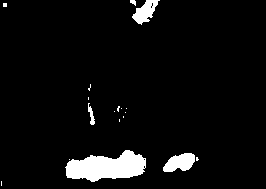

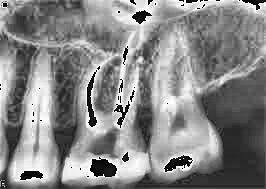

True

In [6]:
import cv2
import numpy as np

# Reading the image from the present directory
image = cv2.imread("/content/images.jpeg")
# Resizing the image for compatibility
#image = cv2.resize(image, (500, 600))

# The initial processing of the image
# image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(image_bw) + 30

# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

# Showing the two images
cv2_imshow(ordinary_img)
cv2_imshow(final_img)
cv2.imwrite('xray1_stretched.png', final_img)


Pillow (PIL):

In [7]:
from PIL import Image, ImageEnhance
image = Image.open('/content/images.jpeg')
enhancer = ImageEnhance.Sharpness(image)
sharpened = enhancer.enhance(2.0)
sharpened.save('sharpened.jpg')


CV2

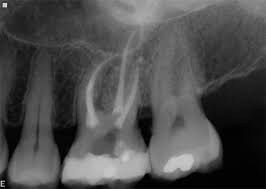

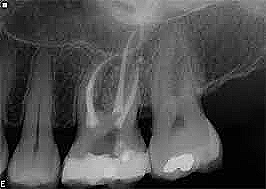

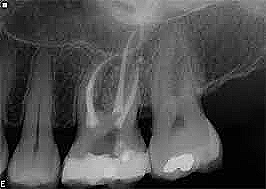

In [8]:
image = cv2.imread("/content/images.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)
cv2_imshow(image)
cv2_imshow(sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()
#sharpened.save('sharpened_cv2.jpg')

image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2_imshow(image_sharp)
cv2.waitKey()
cv2.destroyAllWindows()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

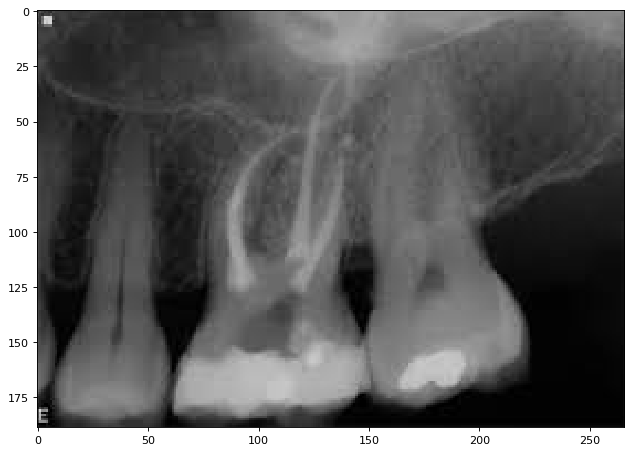

In [10]:
dog = imread('/content/images.jpeg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog);

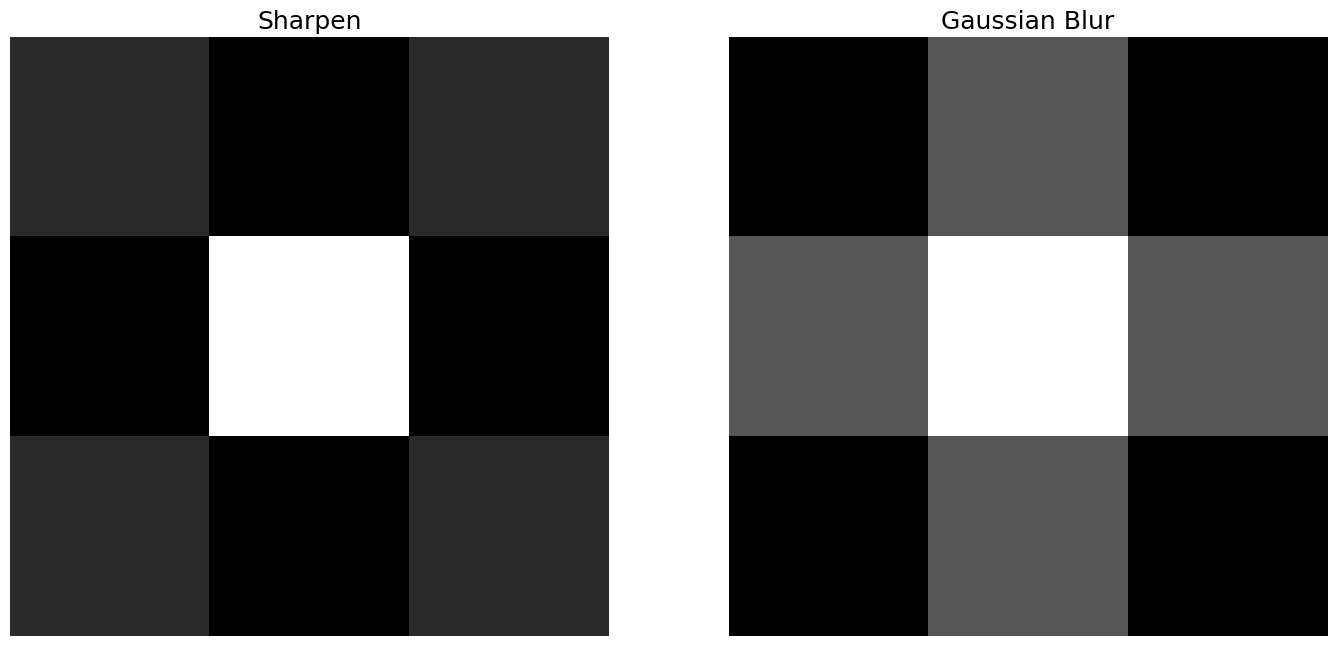

In [11]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)

ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)

[axi.set_axis_off() for axi in ax.ravel()];

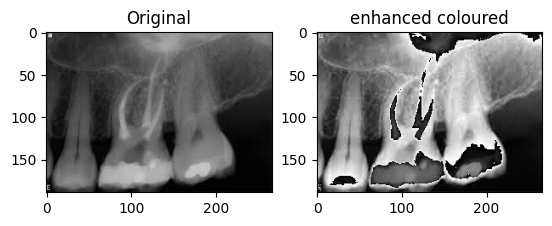

In [12]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/images.jpeg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Convert the image from BGR to HSV color space
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Adjust the hue, saturation, and value of the image
# Adjusts the hue by multiplying it by 0.7
image[:, :, 0] = image[:, :, 0] * 1.5
# Adjusts the saturation by multiplying it by 1.5
image[:, :, 1] = image[:, :, 1] * 2.5
# Adjusts the value by multiplying it by 0.5
image[:, :, 2] = image[:, :, 2] * 2

# Convert the image back to BGR color space
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

#Save the image
cv2.imwrite('enhanced coloured.jpg', image2)

#Plot the enhanced image
plt.subplot(1, 2, 2)
plt.title("enhanced coloured")
plt.imshow(image2)
plt.show()


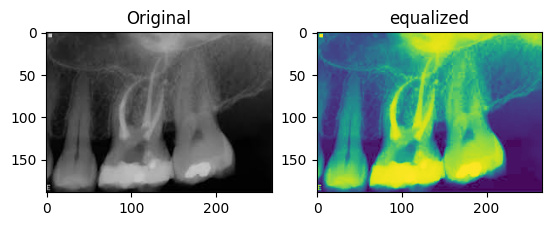

In [13]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/images.jpeg')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Equalize the histogram
equalized_image = cv2.equalizeHist(gray_image)

#Save the equalized image
cv2.imwrite('equalized.jpg', equalized_image)

#Plot the equalized image
plt.subplot(1, 2, 2)
plt.title("equalized")
plt.imshow(equalized_image)
plt.show()


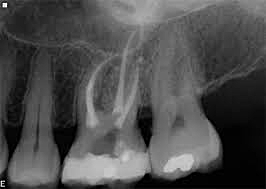

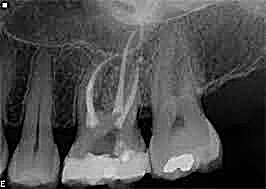

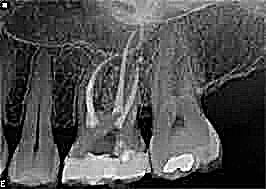

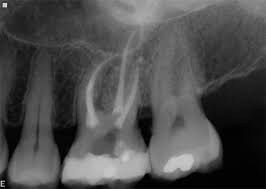

-1

In [14]:
import cv2
import numpy as np
image = cv2.imread('/content/images.jpeg')
rows, cols = image.shape[:2]

# gaussian kernel for sharpening
gaussian_blur = cv2.GaussianBlur(image,(7,7),sigmaX=2)

# sharpening using addWeighted()
sharp1 = cv2.addWeighted(image,1.5,gaussian_blur,-0.5,0)
sharp2 = cv2.addWeighted(image,3.5,gaussian_blur,-2.5,0)
sharp3 = cv2.addWeighted(image,7.5,gaussian_blur,-6.5,0)
# the addweight() method performs a linear comnbination of matrices
# which is simple arithmetic operations for example the first function will
# have the resultant matrix as image * 1.5 + gaussian_blur * (-0.5) + 0

# showing the images
cv2_imshow(sharp1)
cv2_imshow(sharp2)
cv2_imshow(sharp3)
cv2_imshow(image)
cv2.waitKey(0)

Image Sharpened.


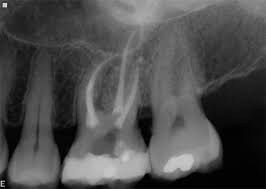

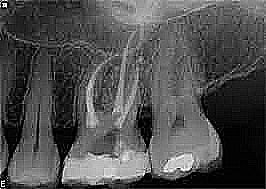

In [15]:
import cv2
import numpy as np

#reading imagae from file
img = cv2.imread("/content/images.jpeg") #Add your png or jpg file here
#SHARPENING EFFECT
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img,-1,kernel_sharpening)
#completion message
print('Image Sharpened.')

#comparing original vs resized
cv2_imshow(img)
cv2_imshow(sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()